In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix,classification_report

## linear dataset

In [2]:
np.random.seed(42)

In [3]:
X,y = make_blobs(n_samples=500,centers=3,n_features=10,random_state=42)
X = X + np.random.normal(scale=3,size=X.shape)

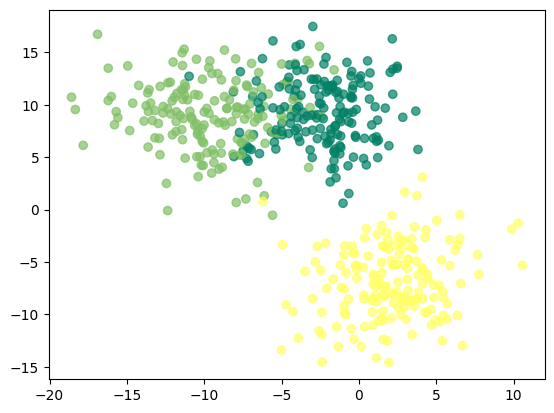

In [4]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer',alpha=0.7)
plt.show()

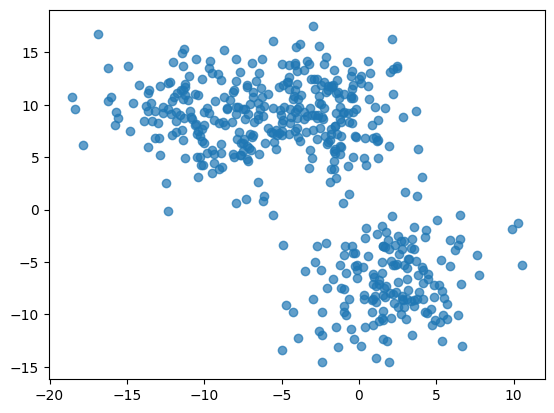

In [5]:
plt.scatter(X[:,0],X[:,1],alpha=0.7)
plt.show()

In [6]:
X.shape

(500, 10)

In [7]:
df_linear = pd.DataFrame(X) 

In [8]:
df_linear.columns = [f"col_{col}" for col in df_linear.columns]

In [9]:
df_linear['target'] = y

In [10]:
df_linear

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,target
0,1.042448,9.807859,7.607007,7.134786,-6.803726,-8.133706,-4.918888,9.622453,0.443692,5.335904,0
1,-12.159376,9.115329,8.090121,-10.774873,-11.099778,-7.999156,-6.280787,2.029685,-4.439213,-8.985930,1
2,-4.149639,9.304412,6.721920,-9.447605,-8.703541,-5.143586,-5.718655,2.692833,-3.892618,-4.689081,1
3,-4.058288,15.553812,6.264862,-0.185593,-6.252867,-11.822218,-8.836556,1.470604,-1.444599,4.026291,0
4,-6.524736,8.679779,6.854208,-6.030898,-11.495838,-7.909416,-5.036629,3.127653,-1.338799,-11.427163,1
...,...,...,...,...,...,...,...,...,...,...,...
495,1.564940,-3.485275,-3.404061,0.006562,-0.146650,2.162237,-6.548056,4.088365,2.397163,-5.406792,2
496,-10.043889,6.358535,6.285884,-5.486397,-7.631735,-6.618071,-6.241526,3.326829,-4.397810,1.280002,1
497,-5.900851,7.824746,3.434386,-11.089261,-10.907161,-8.942259,-1.230922,0.830513,-1.444679,-10.473048,1
498,-6.631714,12.261889,6.738484,1.552825,-4.876267,-0.270501,-9.260702,10.133315,3.165601,9.577018,0


In [11]:
df_linear['target'].value_counts()

target
0    167
1    167
2    166
Name: count, dtype: int64

In [12]:
# sns.pairplot(df_linear)

<Axes: ylabel='Density'>

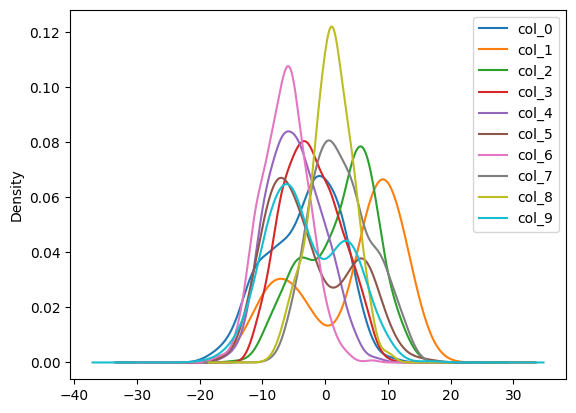

In [13]:
df_linear.iloc[:,:-1].plot(kind='density')

### correlation matrix

In [ ]:
df_linear.iloc[:,:-1].corr()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9
col_0,1.000000,-0.596686,-0.582800,0.267602,0.436562,0.556490,-0.258781,0.031694,0.300183,-0.181078
col_1,-0.596686,1.000000,0.750280,0.130092,-0.581225,-0.800883,-0.044887,0.377606,-0.148635,0.609783
col_2,-0.582800,0.750280,1.000000,0.020749,-0.519103,-0.705792,0.007324,0.258340,-0.205134,0.482888
col_3,0.267602,0.130092,0.020749,1.000000,-0.117845,-0.134096,-0.404126,0.491610,0.340572,0.502113
col_4,0.436562,-0.581225,-0.519103,-0.117845,1.000000,0.564420,0.016577,-0.253946,0.147437,-0.423689
col_5,0.556490,-0.800883,-0.705792,-0.134096,0.564420,1.000000,0.025027,-0.347621,0.160029,-0.587786
col_6,-0.258781,-0.044887,0.007324,-0.404126,0.016577,0.025027,1.000000,-0.322702,-0.215142,-0.348514
col_7,0.031694,0.377606,0.258340,0.491610,-0.253946,-0.347621,-0.322702,1.000000,0.168230,0.590697
col_8,0.300183,-0.148635,-0.205134,0.340572,0.147437,0.160029,-0.215142,0.168230,1.000000,0.147158
col_9,-0.181078,0.609783,0.482888,0.502113,-0.423689,-0.587786,-0.348514,0.590697,0.147158,1.000000


<Axes: >

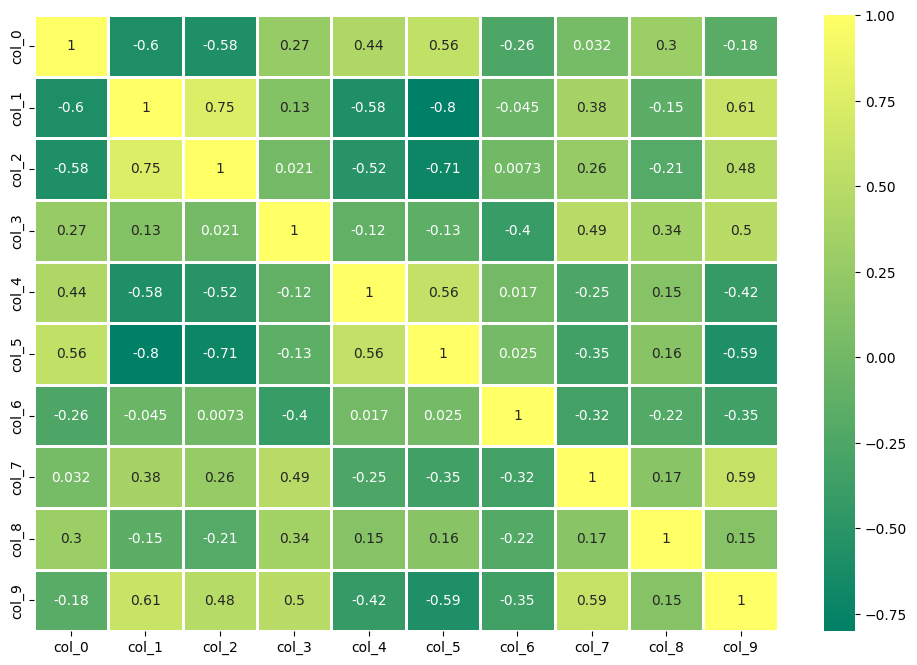

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df_linear.iloc[:,:-1].corr(),cmap='summer',annot=True,linecolor='white',
            linewidths=1)

### data standardization

In [16]:
X_values = df_linear.iloc[:,:-1].values

In [17]:
y_values = df_linear.iloc[:,-1].values

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_values = scaler.fit_transform(X_values)

In [21]:
np.mean(X_values),np.std(X_values)

(1.8118839761882554e-16, 1.0)

In [ ]:
pd.DataFrame(X_values)

,0,1,2,3,4,5,6,7,8,9
0,0.774603,0.728068,0.923203,2.088097,-0.478711,-0.853305,0.407491,1.483993,-0.159084,1.319331
1,-1.555516,0.643815,1.009737,-1.929510,-1.471399,-0.832926,0.037376,-0.140094,-1.617260,-1.001725
2,-0.141799,0.666819,0.764670,-1.631769,-0.917701,-0.400409,0.190143,0.001753,-1.454031,-0.305360
3,-0.125676,1.427117,0.682803,0.445944,-0.351424,-1.411982,-0.657190,-0.259681,-0.722982,1.107090
4,-0.561003,0.590826,0.788365,-0.865312,-1.562917,-0.819333,0.375493,0.094761,-0.691387,-1.397362
...,...,...,...,...,...,...,...,...,...,...
495,0.866823,-0.889166,-1.049060,0.489049,1.059539,0.706161,-0.035258,0.300256,0.424279,-0.421675
496,-1.182133,0.308425,0.686569,-0.743166,-0.670039,-0.623741,0.048046,0.137364,-1.604896,0.662015
497,-0.450888,0.486803,0.175818,-2.000036,-1.426891,-0.975772,1.409748,-0.396595,-0.723006,-1.242734
498,-0.579885,1.026623,0.767637,0.835917,-0.033333,0.337688,-0.772457,1.593266,0.653757,2.006664


### pca application

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca_general = PCA()

In [25]:
pca_general.fit(X_values)

PCA()

In [26]:
explained_variance = pca_general.explained_variance_ratio_

In [27]:
explained_variance

array([0.41061617, 0.24023459, 0.07689139, 0.06280257, 0.0556989 ,
       0.04453503, 0.03424618, 0.030437  , 0.02608438, 0.01845379])

In [28]:
eigenvalues = pca_general.explained_variance_

In [29]:
pd.DataFrame(eigenvalues)

,0
0,4.114390
1,2.407160
2,0.770455
3,0.629284
4,0.558105
5,0.446243
6,0.343148
7,0.304980
8,0.261367
9,0.184908


In [30]:
eigenvectors = pca_general.components_

### scree plot

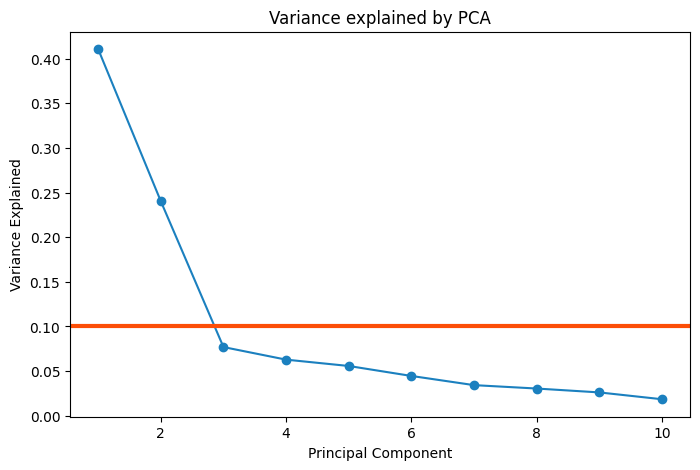

In [31]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [32]:
pca = PCA(n_components=2)

In [33]:
principal_components = pca.fit_transform(X_values)

In [34]:
pd.DataFrame(principal_components).head(8)

,0,1
0,2.141024,1.738619
1,1.485570,-2.943263
2,0.905577,-1.886317
3,2.188009,0.046154
4,1.069884,-1.806852
5,-3.288485,0.917583
6,-3.822670,0.066069
7,1.522085,-2.150802


In [35]:
principal_df = pd.DataFrame(data = principal_components,columns = ['principal component 1','principal component 2'])

In [36]:
final_df = pd.concat([principal_df,df_linear[['target']]],axis = 1)

In [37]:
final_df

,principal component 1,principal component 2,target
0,2.141024,1.738619,0
1,1.485570,-2.943263,1
2,0.905577,-1.886317,1
3,2.188009,0.046154,0
4,1.069884,-1.806852,1
...,...,...,...
495,-1.805745,1.115023,2
496,1.565097,-1.462578,1
497,0.476875,-2.827932,1
498,2.088112,1.788159,0


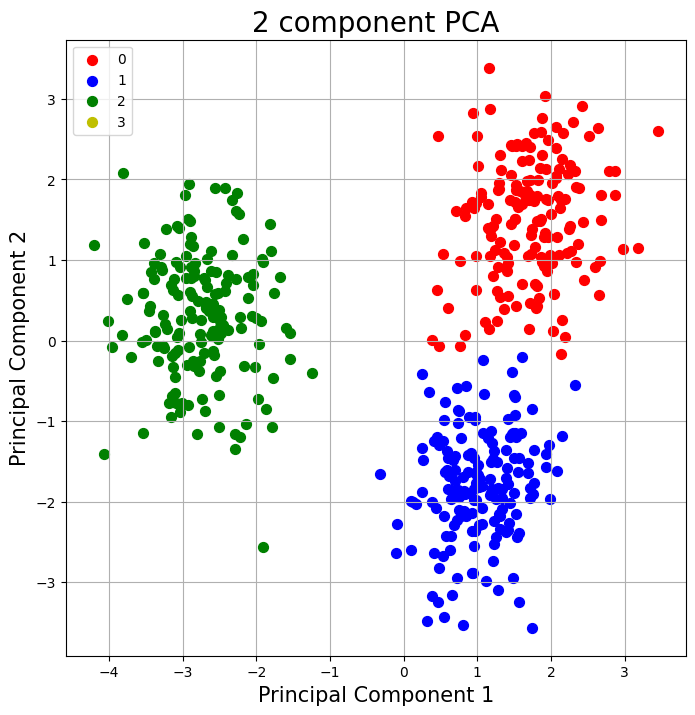

In [38]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1,2,3]
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### biplot

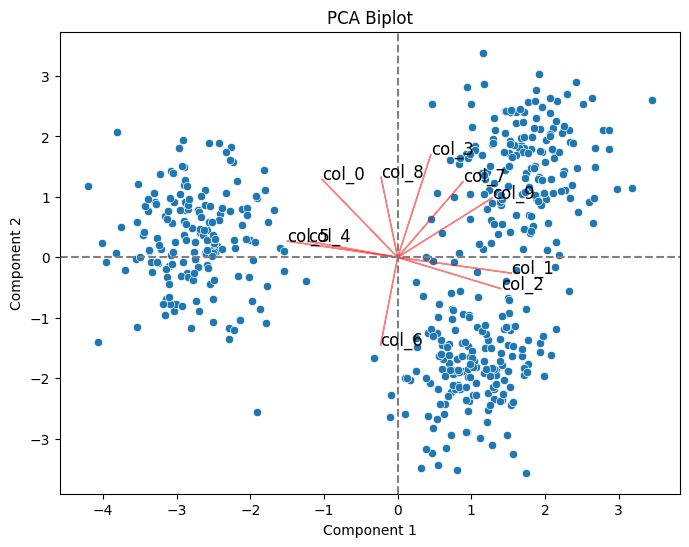

In [39]:
scores = pca.transform(X_values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
for i, col in enumerate(df_linear.iloc[:,:-1].columns):
    plt.arrow(0, 0, eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), col, fontsize=12)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Biplot')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

### loading plot

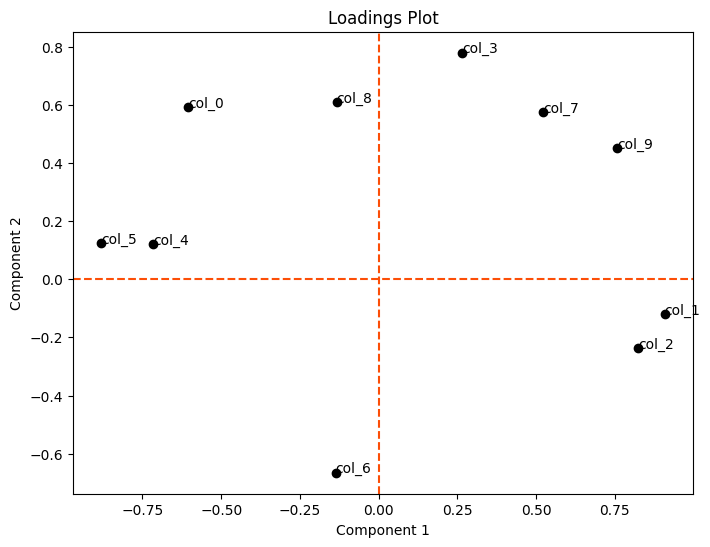

In [40]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='black')
for i, txt in enumerate(df_linear.iloc[:,:-1].columns):
    plt.text(loadings[i, 0], loadings[i, 1], txt, fontsize=10)
plt.axhline(0, color='#FC4E07', linestyle='--')
plt.axvline(0, color='#FC4E07', linestyle='--')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Loadings Plot')
plt.show()

### scores

In [41]:
scores_pca = pca.transform(X_values)

In [42]:
pd.DataFrame(scores_pca).head()

,0,1
0,2.141024,1.738619
1,1.485570,-2.943263
2,0.905577,-1.886317
3,2.188009,0.046154
4,1.069884,-1.806852


### clustering 

In [43]:
from sklearn.cluster import KMeans

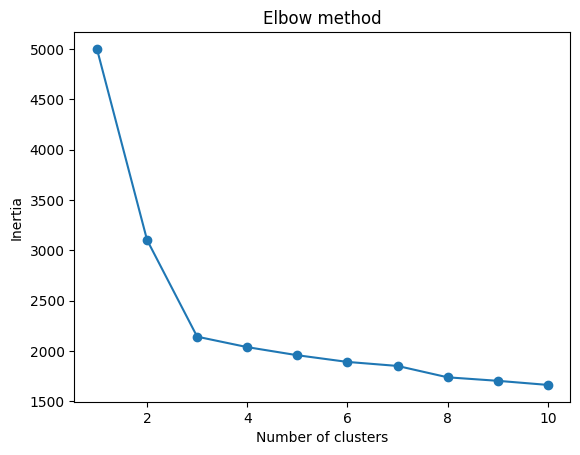

In [44]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_values)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [45]:
kmeans = KMeans(n_clusters=3)

In [46]:
kmeans.fit(X_values)

KMeans(n_clusters=3)

In [47]:
df_linear['k_means'] = kmeans.labels_

In [48]:
df_linear

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,target,k_means
0,1.042448,9.807859,7.607007,7.134786,-6.803726,-8.133706,-4.918888,9.622453,0.443692,5.335904,0,2
1,-12.159376,9.115329,8.090121,-10.774873,-11.099778,-7.999156,-6.280787,2.029685,-4.439213,-8.985930,1,0
2,-4.149639,9.304412,6.721920,-9.447605,-8.703541,-5.143586,-5.718655,2.692833,-3.892618,-4.689081,1,0
3,-4.058288,15.553812,6.264862,-0.185593,-6.252867,-11.822218,-8.836556,1.470604,-1.444599,4.026291,0,2
4,-6.524736,8.679779,6.854208,-6.030898,-11.495838,-7.909416,-5.036629,3.127653,-1.338799,-11.427163,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.564940,-3.485275,-3.404061,0.006562,-0.146650,2.162237,-6.548056,4.088365,2.397163,-5.406792,2,1
496,-10.043889,6.358535,6.285884,-5.486397,-7.631735,-6.618071,-6.241526,3.326829,-4.397810,1.280002,1,0
497,-5.900851,7.824746,3.434386,-11.089261,-10.907161,-8.942259,-1.230922,0.830513,-1.444679,-10.473048,1,0
498,-6.631714,12.261889,6.738484,1.552825,-4.876267,-0.270501,-9.260702,10.133315,3.165601,9.577018,0,2


In [49]:
from scipy.optimize import linear_sum_assignment

y_true = df_linear['target'].values  
y_kmeans = df_linear['k_means'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_linear['k_means'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_linear['k_means'] == y_true))

accuracy before: 0.006
accuracy after: 0.994


In [50]:
df_linear

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,target,k_means
0,1.042448,9.807859,7.607007,7.134786,-6.803726,-8.133706,-4.918888,9.622453,0.443692,5.335904,0,0
1,-12.159376,9.115329,8.090121,-10.774873,-11.099778,-7.999156,-6.280787,2.029685,-4.439213,-8.985930,1,1
2,-4.149639,9.304412,6.721920,-9.447605,-8.703541,-5.143586,-5.718655,2.692833,-3.892618,-4.689081,1,1
3,-4.058288,15.553812,6.264862,-0.185593,-6.252867,-11.822218,-8.836556,1.470604,-1.444599,4.026291,0,0
4,-6.524736,8.679779,6.854208,-6.030898,-11.495838,-7.909416,-5.036629,3.127653,-1.338799,-11.427163,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.564940,-3.485275,-3.404061,0.006562,-0.146650,2.162237,-6.548056,4.088365,2.397163,-5.406792,2,2
496,-10.043889,6.358535,6.285884,-5.486397,-7.631735,-6.618071,-6.241526,3.326829,-4.397810,1.280002,1,1
497,-5.900851,7.824746,3.434386,-11.089261,-10.907161,-8.942259,-1.230922,0.830513,-1.444679,-10.473048,1,1
498,-6.631714,12.261889,6.738484,1.552825,-4.876267,-0.270501,-9.260702,10.133315,3.165601,9.577018,0,0


In [51]:
print(np.unique(df_linear['target']))

[0 1 2]


In [52]:
print(np.unique(kmeans.labels_))

[0 1 2]


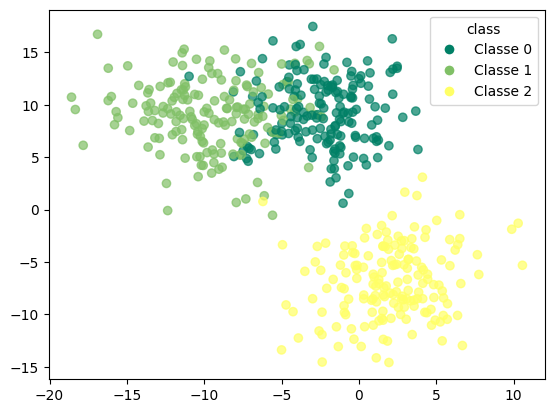

In [53]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_linear.iloc[:, 0], df_linear.iloc[:, 1], 
                      c=df_linear['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_linear['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Classe {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

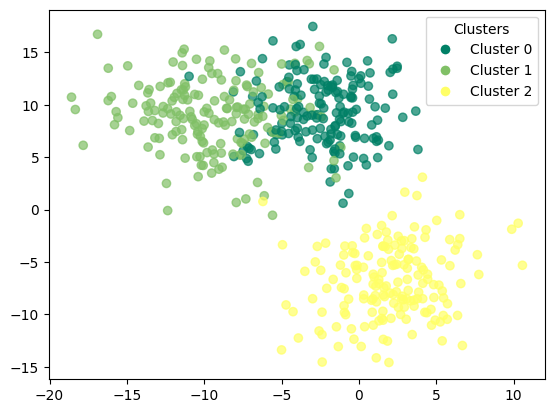

In [54]:
scatter = plt.scatter(df_linear.iloc[:, 0], df_linear.iloc[:, 1], 
                      c=df_linear['k_means'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_linear['k_means'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()


In [55]:
kmeans.cluster_centers_

array([[-1.08140449,  0.62723372,  0.70567727, -0.77186516, -0.46622817,
        -0.56947026,  0.60572876, -0.44562038, -0.63055152, -0.19517172],
       [ 0.94722635, -1.2997396 , -1.16698028, -0.19906535,  0.93114822,
         1.22137877,  0.05326183, -0.57089495,  0.25800798, -0.94505676],
       [ 0.16219018,  0.66540879,  0.44971701,  1.00159711, -0.45921839,
        -0.6459691 , -0.68180093,  1.03978064,  0.39246606,  1.15889399]])

In [56]:
print(confusion_matrix(df_linear['target'],df_linear['k_means']))

[[164   3   0]
 [  0 167   0]
 [  0   0 166]]


In [57]:
print(classification_report(df_linear['target'],df_linear['k_means']))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       167
           1       0.98      1.00      0.99       167
           2       1.00      1.00      1.00       166

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500



### clustering with pca

In [58]:
WCSS = []

for i in range(1,30):
  kmeans_pca = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

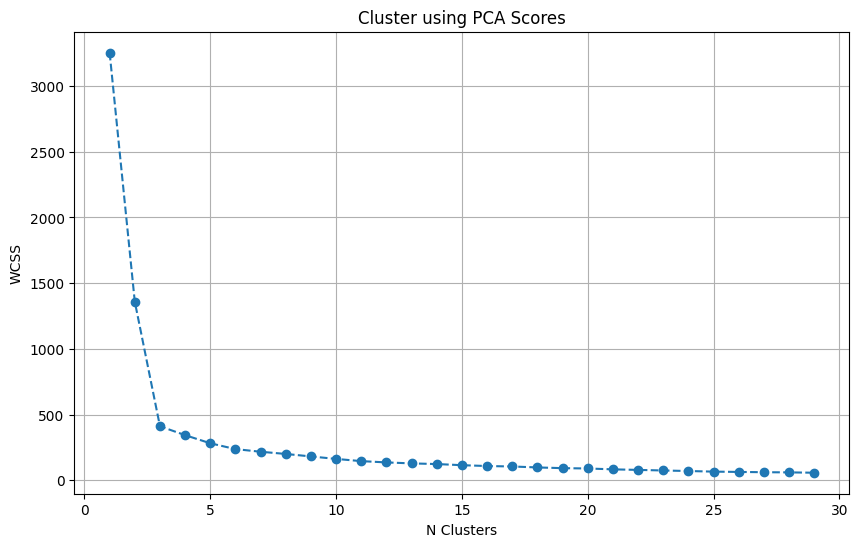

In [59]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30), WCSS, marker = "o", linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.show()

In [60]:
kmeans_pca = KMeans(n_clusters=4,init='k-means++')

In [61]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4)

In [62]:
df_clust_pca_kmeans = pd.concat([df_linear.iloc[:,:-1], pd.DataFrame(scores_pca)], axis = 1)

In [63]:
df_clust_pca_kmeans.columns.values[-2:] = ["comp1", "comp2"]

In [64]:
df_clust_pca_kmeans["segment_kmeans_pca"] = kmeans_pca.labels_

In [65]:
df_clust_pca_kmeans["target"] = y

In [66]:
df_clust_pca_kmeans

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,target,comp1,comp2,segment_kmeans_pca
0,1.042448,9.807859,7.607007,7.134786,-6.803726,-8.133706,-4.918888,9.622453,0.443692,5.335904,0,2.141024,1.738619,2
1,-12.159376,9.115329,8.090121,-10.774873,-11.099778,-7.999156,-6.280787,2.029685,-4.439213,-8.985930,1,1.485570,-2.943263,3
2,-4.149639,9.304412,6.721920,-9.447605,-8.703541,-5.143586,-5.718655,2.692833,-3.892618,-4.689081,1,0.905577,-1.886317,3
3,-4.058288,15.553812,6.264862,-0.185593,-6.252867,-11.822218,-8.836556,1.470604,-1.444599,4.026291,0,2.188009,0.046154,1
4,-6.524736,8.679779,6.854208,-6.030898,-11.495838,-7.909416,-5.036629,3.127653,-1.338799,-11.427163,1,1.069884,-1.806852,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.564940,-3.485275,-3.404061,0.006562,-0.146650,2.162237,-6.548056,4.088365,2.397163,-5.406792,2,-1.805745,1.115023,0
496,-10.043889,6.358535,6.285884,-5.486397,-7.631735,-6.618071,-6.241526,3.326829,-4.397810,1.280002,1,1.565097,-1.462578,1
497,-5.900851,7.824746,3.434386,-11.089261,-10.907161,-8.942259,-1.230922,0.830513,-1.444679,-10.473048,1,0.476875,-2.827932,3
498,-6.631714,12.261889,6.738484,1.552825,-4.876267,-0.270501,-9.260702,10.133315,3.165601,9.577018,0,2.088112,1.788159,2


<Axes: ylabel='Frequency'>

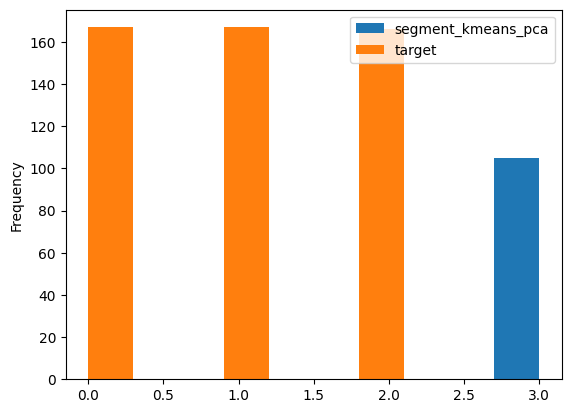

In [67]:
df_clust_pca_kmeans[['segment_kmeans_pca','target']].plot(kind='hist')

In [68]:
print(confusion_matrix(df_linear['target'],df_clust_pca_kmeans['segment_kmeans_pca']))

[[  0  12 155   0]
 [  0  63   0 104]
 [165   0   0   1]
 [  0   0   0   0]]


In [69]:
print(classification_report(df_linear['target'],df_clust_pca_kmeans['segment_kmeans_pca']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       167
           1       0.84      0.38      0.52       167
           2       0.00      0.00      0.00       166
           3       0.00      0.00      0.00         0

    accuracy                           0.13       500
   macro avg       0.21      0.09      0.13       500
weighted avg       0.28      0.13      0.17       500



c:\Users\adepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

## non linear dataset

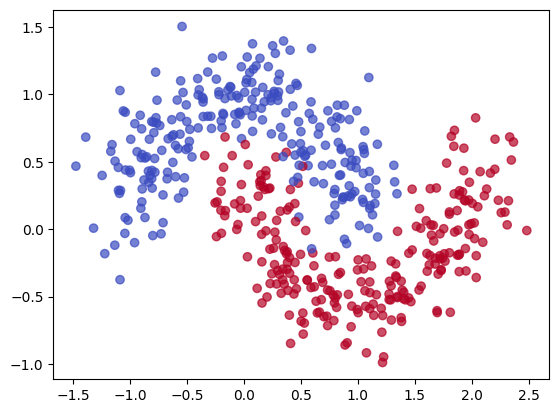

In [70]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

num_extra_features = 10
extra_features = np.random.normal(scale=0.5, size=(X.shape[0], num_extra_features))  
X_extended = np.hstack((X, extra_features))

df2 = pd.DataFrame(X_extended, columns=[f"Feature_{i+1}" for i in range(X_extended.shape[1])])
df2["Target"] = y

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.show()

In [71]:
df2

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Target
0,0.830858,-0.334342,0.316060,-0.311374,-0.212450,0.529011,0.095816,0.599266,0.399030,-0.588336,-0.051067,0.494975,1
1,0.991710,0.879000,-0.611088,0.209855,-0.019618,-0.877394,0.059830,-0.418734,-0.583826,0.004570,-0.965426,-0.337145,0
2,1.107245,-0.470344,1.275587,0.325111,-0.440712,0.702083,-0.496022,-0.276848,-0.574426,0.128040,0.684315,-0.499503,1
3,-0.140899,1.033148,-1.030222,0.545483,0.776900,-0.997540,0.230027,0.113253,-0.393738,-0.697178,0.495875,0.089535,0
4,0.405592,1.328529,0.127213,-0.310885,-0.400955,-1.227487,-0.114014,0.719413,-0.445127,-0.761207,0.217832,0.310040,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.265123,1.023197,-0.847077,-0.350358,0.312980,0.117033,-0.628302,-0.203006,0.346232,-0.224246,-0.708883,1.128814,0
496,0.193576,-0.011663,-0.083479,-0.581789,0.085632,-0.042802,-0.770739,0.046684,0.491868,-0.116455,-1.030099,0.170961,1
497,0.345548,-0.128434,0.301450,-0.293206,-0.289531,1.128928,-0.329107,-0.560940,0.012557,0.287421,0.266217,-1.234034,1
498,1.403890,-0.466993,-0.330366,0.576444,0.163345,-0.617896,0.621205,0.482449,-0.148301,0.439734,0.999878,-0.527190,1


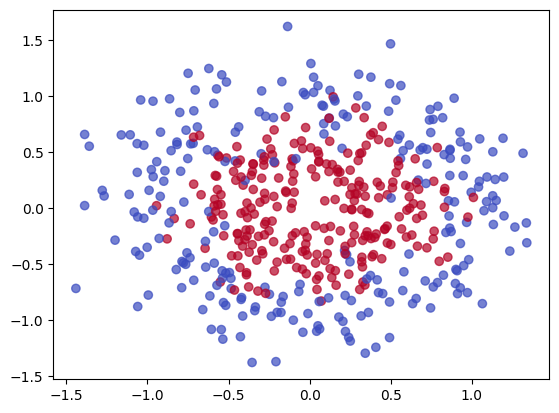

In [72]:
X, y = make_circles(n_samples=500, noise=0.2, factor=0.5, random_state=42)

num_extra_features = 10
extra_features = np.random.normal(scale=0.5, size=(X.shape[0], num_extra_features))
X_extended = np.hstack((X, extra_features))

df3 = pd.DataFrame(X_extended, columns=[f"Feature_{i+1}" for i in range(X_extended.shape[1])])
df3["Target"] = y

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.show()

In [73]:
df3

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Target
0,-0.469004,0.323509,0.120777,-0.050359,0.321675,0.570485,-0.636415,0.033766,-0.026563,0.101707,-0.007735,-0.490331,1
1,0.125867,1.048157,0.727375,0.940381,0.273445,0.299051,0.065525,0.484602,-1.221573,-0.001931,-0.286314,0.072909,0
2,-0.386288,0.042201,0.546314,0.009517,-0.180246,-0.701636,-0.054638,0.336139,-0.420544,-1.001670,1.137120,0.167588,1
3,-0.494481,-0.578267,-0.110787,0.695497,0.070740,0.666016,0.623181,-0.637260,0.229997,0.862643,-0.499325,-0.493187,0
4,-0.714102,0.865415,-0.408601,0.445209,0.142193,-0.967886,0.170473,-0.125957,-0.056138,-0.418510,0.174129,0.525229,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.854312,0.509894,-0.016221,0.790009,-0.272041,-0.698491,0.402184,-0.047936,-0.290620,0.038336,-0.792192,-0.874034,0
496,0.600061,-0.021119,0.046282,0.217181,0.696929,0.443319,0.317682,0.635217,0.244948,-0.172101,0.456193,0.437802,1
497,-0.715531,0.630037,-0.003908,-0.599903,-0.892535,0.421199,0.239337,0.309549,0.439869,-0.449512,-0.938348,0.257928,1
498,-0.318829,-0.743461,0.598871,0.175930,-0.743177,0.120345,-0.562373,-0.771208,-0.003834,0.081249,-0.049311,0.219068,1
